**Library Imports**

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import os
import sys
print(sys.version)   # Python version information

3.4.4 |Anaconda 2.4.0 (64-bit)| (default, Jan 11 2016, 13:54:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
from sympy import *  # Symbolic mathematics
import sympy

In [4]:
import numpy as np   # N-Dimensional arrays and numerical routines
import pandas as pd  # Data structures and data analysis tools
import scipy         # Numerical routines

In [5]:
#import numba        # Decorators for speeding up python functions

In [6]:
#from astropy import constants  # Physical Constants
#from astropy import units      # Physical Units

In [7]:
import matplotlib as mpl  # Standard plotting library
import matplotlib.pyplot as plt 
import seaborn as sns     # Statistical plotting and improved plot style
#import bokeh             # Interactive visualization library

In [8]:
from sympy.utilities.autowrap import ufuncify  # Creates numerical methods 
                                               # from symbolic expressions

In [9]:
from sympy import abc       # Symbolic variables
from sympy import pi as Pi  # Symbolic pi
from sympy import I as I    # Symbolic imaginary unit

**Display**

In [10]:
from IPython.display import display

In [11]:
from IPython.display import set_matplotlib_formats  
set_matplotlib_formats('pdf', 'png')

In [12]:
import ipywidgets

**Settings & Options**

In [13]:
np.set_printoptions(precision=5, threshold=6, edgeitems=3, linewidth=75, 
                    suppress=False, nanstr=None, infstr=None, 
                    formatter=None)

In [14]:
pandas_options = {'display.chop_threshold': None,
                  'display.precision': 4,
                  'display.max_columns': 8,
                  'display.max_rows': 8,
                  'display.max_info_columns': 8,
                  'display.max_info_rows': 8}
for key, val in pandas_options.items():
    pd.set_option(key, val)

In [15]:
sympy.interactive.printing.init_printing(use_latex='mathjax')

In [16]:
# os.system('jupyter nbconvert --to pdf {filename}.ipynb')

**Custom functions**

In [17]:
latex_path = os.path.join(os.getcwd(), 'latex', 'figures')
def figure_path(fname): 
    return os.path.join(latex_path, fname)
print(os.getcwd())

/home/jaan/Dropbox/Projects/Crowd-Dynamics/documentation/notebooks


In [18]:
import numba

# Adjusting force

\begin{align}
\mathbf{f}_{i}^{adj} &= \frac{m_{i}}{\tau_{i}^{adj}} (v_{i}^{0} \cdot \hat{\mathbf{e}}_{i}^{0} - \mathbf{v}_{i}) 
\end{align}

# Agent - Agent interaction forces $ \mathbf{f}_{ij} $ 

## Social

\begin{align}
\mathbf{f}_{ij}^{pow} &= - \left(\frac{k}{a \tau^{2}}\right) 
\left(\frac{2}{\tau} + \frac{1}{\tau_{0}}\right) 
\exp\left (-\frac{\tau}{\tau_{0}}\right )
\left(\mathbf{v}_{ij} -\frac{a \mathbf{x}_{ij} + b \mathbf{v}_{ij}}{d} \right)
\end{align}

\begin{align}
a &= \mathbf{v}_{ij} \cdot \mathbf{v}_{ij} \\
b &= -\mathbf{x}_{ij} \cdot \mathbf{v}_{ij} \\
c &= \mathbf{x}_{ij} \cdot \mathbf{x}_{ij} - r_{ij}^{2} \\
d &= \sqrt{b^{2} - a c} \\
\tau &= \frac{b - d}{a} > 0.
\end{align}

In [19]:
x = symbols('x_0:2', real=True)
v = symbols('v_0:2', real=True)
r = symbols('r', positive=True)
k = symbols('k', positive=True)
tau_0 = symbols('tau_0', positive=True)

In [20]:
a = np.dot(v, v)
b = - np.dot(x, v)
c = np.dot(x, x) - r ** 2
d = sqrt(b ** 2 - a * c)

In [21]:
x = Matrix(x)
v = Matrix(v)

In [22]:
Matrix([a, b, c, d])

⎡                          2     2                        ⎤
⎢                        v₀  + v₁                         ⎥
⎢                                                         ⎥
⎢                     -v₀⋅x₀ - v₁⋅x₁                      ⎥
⎢                                                         ⎥
⎢                       2     2     2                     ⎥
⎢                    - r  + x₀  + x₁                      ⎥
⎢                                                         ⎥
⎢   ______________________________________________________⎥
⎢  ╱   ⎛  2     2⎞ ⎛   2     2     2⎞                   2 ⎥
⎣╲╱  - ⎝v₀  + v₁ ⎠⋅⎝- r  + x₀  + x₁ ⎠ + (-v₀⋅x₀ - v₁⋅x₁)  ⎦

In [23]:
tau = (b - d) / a

In [24]:
simplify(tau)

 ⎛                   _____________________________________________________⎞ 
 ⎜                  ╱   ⎛  2     2⎞ ⎛   2     2     2⎞                  2 ⎟ 
-⎝v₀⋅x₀ + v₁⋅x₁ + ╲╱  - ⎝v₀  + v₁ ⎠⋅⎝- r  + x₀  + x₁ ⎠ + (v₀⋅x₀ + v₁⋅x₁)  ⎠ 
────────────────────────────────────────────────────────────────────────────
                                   2     2                                  
                                 v₀  + v₁                                   

In [25]:
m = 2

In [26]:
k / (a * tau ** m) * exp(-tau / tau_0) * (m / tau + 1 / tau_0)

                                                                              
                                                                              
                                                                              
                                                                              
              ⎛                                ⎛  2     2⎞                    
  ⎛  2     2⎞ ⎜                              2⋅⎝v₀  + v₁ ⎠                    
k⋅⎝v₀  + v₁ ⎠⋅⎜───────────────────────────────────────────────────────────────
              ⎜                    ___________________________________________
              ⎜                   ╱   ⎛  2     2⎞ ⎛   2     2     2⎞          
              ⎝-v₀⋅x₀ - v₁⋅x₁ - ╲╱  - ⎝v₀  + v₁ ⎠⋅⎝- r  + x₀  + x₁ ⎠ + (-v₀⋅x₀
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                 ⎛  

## Contact

\begin{align}
\mathbf{f}_{ij}^{c} &= 
\begin{cases}
h_{ij} \cdot \left(\mu \cdot \hat{\mathbf{n}}_{ij} - \kappa \cdot \left(\mathbf{v}_{ji} \cdot \hat{\mathbf{t}}_{ij}\right) \hat{\mathbf{t}}_{ij}\right) & h_{ij} > 0 \\
0 & \text{otherwise}
\end{cases}
\end{align}

# Agent - Wall interaction forces $ \mathbf{f}_{iw} $ 

## Social

\begin{align}
\mathbf{f}_{iw}^{soc} &=
\begin{cases}
A_{i} \exp\left(\frac{h_{iw}}{B_{i}}\right) \hat{\mathbf{n}}_{iw} &  d_{iw} \leq \text{sight} \\
0 & \text{otherwise}
\end{cases}
\end{align} 

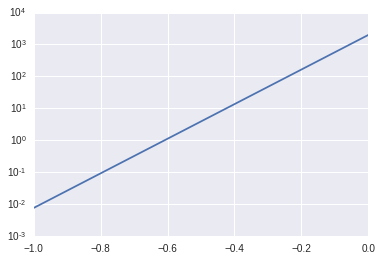

In [37]:
%matplotlib inline
a = 2e3,
b = 0.08
x = np.linspace(-1, 0)
plt.semilogy(x, a * np.exp(x / b))

## Contact

\begin{align}
\mathbf{f}_{iw}^{c} &= 
\begin{cases}
h_{iw} \cdot \left(\mu \cdot \hat{\mathbf{n}}_{iw} - \kappa \cdot (\mathbf{v}_{i} \cdot \hat{\mathbf{t}}_{iw}) \hat{\mathbf{t}}_{iw}\right) & h_{iw} > 0 \\
0 & \text{otherwise}
\end{cases}
\end{align}

# Random fluctuation $ \boldsymbol{\xi}_{i} $ 

\begin{align}
\boldsymbol{\xi}_{i} &= f \left[\begin{matrix}\cos{\left (\theta \right )} & \sin{\left (\theta \right )}\end{matrix}\right] & f \in \mathcal{U}(0, f_{max}), \quad \theta \in [0, \pi) \\
\end{align}

In [27]:
r = symbols('r')
theta = symbols('theta')

In [28]:
Matrix([cos(theta), sin(theta)])

⎡cos(θ)⎤
⎢      ⎥
⎣sin(θ)⎦